The goal of this paper is to analyze the evidence of clustering based on the selected data. To this end, I chose several data from Eurostat-database, in order to find out if there are clusters in term of trade in the European Union (28 countries).

1)Manipulation of data before applying clustering:

I extracted several data from Eurostat:

“Extra-EU28 trade, by Member State, t-data total product - Exports in million of ECU/EURO.xlsx”
“Extra-EU28 trade, by Member State, total product - Imports in million of ECU/EURO.xlsx”
“GDP - Gross domestic product at market prices.xlsx”
“I_TR_EX - Intra-EU28 trade, by Member State, total product - Exports in million of ECU/EURO.xlsx”
“I_TR_IM - Intra-EU28 trade, by Member State, total product - Imports in million of ECU/EURO.xlsx”
“Air transport of goods.xlsx”

I merged all the above data with excel: “Trade_Project.xlsx”, except for the last one: “Air transport of goods.xlsx”, that I merged with RStudio.

I created also several variables in RStudio, I calculated the totals, and trade to GDP ratio

Finally, the dataset “trade” contains 28 rows, and 12 columns

In [2]:
library(cluster)
library(factoextra)
library(flexclust)
library(fpc)
library(clustertend)
library(ClusterR)
library(NbClust)
library(readxl)
library(reshape)
library(psych)

In [3]:
getwd() 
setwd("/Users/lajobu/Desktop/Project Clustering/")
getwd()

[1] "/Users/lajobu"

[1] "/Users/lajobu/Desktop/Project Clustering"

In [5]:
trade <- read_excel("Trade_Project.xlsx")

In [6]:
show(trade)

# A tibble: 28 x 6
   C_EU          GDP I_TR_EX I_TR_IM E_TR_EX E_TR_IM
   <chr>       <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 Austria   385712. 111673. 127260.  44756.  36748.
 2 Belgium   459820. 287689. 245472. 107201  136329.
 3 Bulgaria   56087.  19275.  20403.   8821.  11702.
 4 Croatia    51579.  10001.  18557.   4749.   5330.
 5 Cyprus     21138.   1250.   5277.   3001.   3890.
 6 Czechia   207772. 144491. 119732.  26769.  36726.
 7 Denmark   301341.  56594.  60784.  36013   26001 
 8 Estonia    26036.   9814.  12435.   4611.   3794.
 9 Finland   234453   37884.  46716.  26352.  19861 
10 France   2353090  290669. 392438. 201915. 175901.
# … with 18 more rows


In [7]:
trade$T_TR_I<-(trade$I_TR_EX + trade$I_TR_IM) #Total intra-EU28 trade, column 7
trade$T_TR_E<-(trade$E_TR_EX + trade$E_TR_IM) #Total extra-EU28 trade, column 8
trade$T_TR_IM<-(trade$I_TR_IM + trade$E_TR_IM) #Total imports-EU28 trade, column 9
trade$T_TR_EX<-(trade$I_TR_EX + trade$E_TR_EX) #Total exports-EU28 trade, column 10
trade$T_GDP_R<-((trade$T_TR_IM + trade$T_TR_EX)/trade$GDP)*100 #Total trade to GDP ratio, column 11

show(trade) #28x11

# A tibble: 28 x 11
   C_EU     GDP I_TR_EX I_TR_IM E_TR_EX E_TR_IM T_TR_I T_TR_E T_TR_IM T_TR_EX
   <chr>  <dbl>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>  <dbl>   <dbl>   <dbl>
 1 Aust… 3.86e5 111673. 127260.  44756.  36748. 2.39e5 8.15e4 164008. 156429.
 2 Belg… 4.60e5 287689. 245472. 107201  136329. 5.33e5 2.44e5 381801. 394890.
 3 Bulg… 5.61e4  19275.  20403.   8821.  11702. 3.97e4 2.05e4  32105.  28096.
 4 Croa… 5.16e4  10001.  18557.   4749.   5330. 2.86e4 1.01e4  23887.  14750.
 5 Cypr… 2.11e4   1250.   5277.   3001.   3890. 6.53e3 6.89e3   9166.   4252.
 6 Czec… 2.08e5 144491. 119732.  26769.  36726. 2.64e5 6.35e4 156458. 171260.
 7 Denm… 3.01e5  56594.  60784.  36013   26001  1.17e5 6.20e4  86785.  92607.
 8 Esto… 2.60e4   9814.  12435.   4611.   3794. 2.22e4 8.40e3  16228.  14424.
 9 Finl… 2.34e5  37884.  46716.  26352.  19861  8.46e4 4.62e4  66577.  64236.
10 Fran… 2.35e6 290669. 392438. 201915. 175901. 6.83e5 3.78e5 568339. 492584.
# … with 18 more rows, and 1 more variable: 

In [9]:
air <- read_excel("Air transport of goods.xlsx", sheet = "Sheet2", col_types = c("text", "numeric"))
trade$A_T_G <- air$Values #Air transport of goods, column 12

show(trade) #28x12

# A tibble: 28 x 12
   C_EU     GDP I_TR_EX I_TR_IM E_TR_EX E_TR_IM T_TR_I T_TR_E T_TR_IM T_TR_EX
   <chr>  <dbl>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>  <dbl>   <dbl>   <dbl>
 1 Aust… 3.86e5 111673. 127260.  44756.  36748. 2.39e5 8.15e4 164008. 156429.
 2 Belg… 4.60e5 287689. 245472. 107201  136329. 5.33e5 2.44e5 381801. 394890.
 3 Bulg… 5.61e4  19275.  20403.   8821.  11702. 3.97e4 2.05e4  32105.  28096.
 4 Croa… 5.16e4  10001.  18557.   4749.   5330. 2.86e4 1.01e4  23887.  14750.
 5 Cypr… 2.11e4   1250.   5277.   3001.   3890. 6.53e3 6.89e3   9166.   4252.
 6 Czec… 2.08e5 144491. 119732.  26769.  36726. 2.64e5 6.35e4 156458. 171260.
 7 Denm… 3.01e5  56594.  60784.  36013   26001  1.17e5 6.20e4  86785.  92607.
 8 Esto… 2.60e4   9814.  12435.   4611.   3794. 2.22e4 8.40e3  16228.  14424.
 9 Finl… 2.34e5  37884.  46716.  26352.  19861  8.46e4 4.62e4  66577.  64236.
10 Fran… 2.35e6 290669. 392438. 201915. 175901. 6.83e5 3.78e5 568339. 492584.
# … with 18 more rows, and 2 more variables:

In [10]:
#data description

summary(trade)

     C_EU                GDP             I_TR_EX          I_TR_IM      
 Length:28          Min.   :  12324   Min.   :  1250   Min.   :  3867  
 Class :character   1st Qu.:  54960   1st Qu.: 17411   1st Qu.: 21085  
 Mode  :character   Median : 205834   Median : 62119   Median : 61327  
                    Mean   : 567906   Mean   :125855   Mean   :123237  
                    3rd Qu.: 477487   3rd Qu.:181395   3rd Qu.:165952  
                    Max.   :3344370   Max.   :778747   Max.   :722546  
    E_TR_EX          E_TR_IM           T_TR_I            T_TR_E      
 Min.   :  1081   Min.   :  1491   Min.   :   5338   Min.   :  2571  
 1st Qu.:  8871   1st Qu.: 11184   1st Qu.:  39244   1st Qu.: 20591  
 Median : 22850   Median : 25792   Median : 123022   Median : 45744  
 Mean   : 69923   Mean   : 70741   Mean   : 249092   Mean   :140664  
 3rd Qu.: 76874   3rd Qu.: 85964   3rd Qu.: 347605   3rd Qu.:143178  
 Max.   :541985   Max.   :364885   Max.   :1501293   Max.   :906870  
    T_

2)Pre-diagnosis:

Firstly, I created two groups of data, but when I applied Hopkins the results were greater than 15%, this means that the groups selected were not highly clustered.

Consequently, I decided to create three additional groups, and I selected the one with the smallest Hopkins value, hence I selected “X1”, with the Hopkins value of: 0.1134274 (11,34%).

In [11]:
X1<-trade[,c(2,11,12)] 
X1 #GDP, T_GDP_R, A_T_G

GDP,T_GDP_R,A_T_G
<dbl>,<dbl>,<dbl>
385711.9,83.07662,237701
459819.8,168.91215,1416428
56086.9,107.33433,29867
51579.1,74.90864,11934
21137.8,63.47917,32186
207772.4,157.72923,90526
301340.9,59.53128,242068
26035.9,117.73205,11475
234453.0,55.79485,196810


Warning message:
“In prcomp.default(X1, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", 
    geom = "point", ggtheme = theme_classic(), legend = "bottom") :
 extra arguments ‘title’, ‘geom’, ‘ggtheme’, ‘legend’ will be disregarded”


[1] 0.8865726

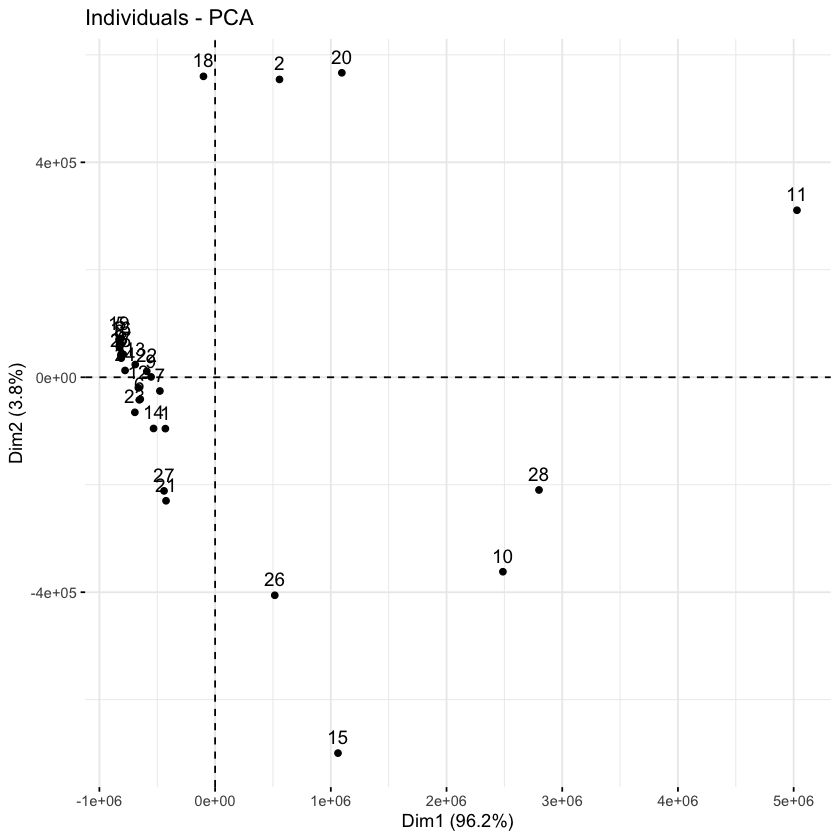

In [13]:
fviz_pca_ind(prcomp(X1, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", geom = "point", ggtheme = theme_classic(),legend = "bottom"))

hop <- get_clust_tendency(X1, n = nrow(X1)-1, graph = FALSE)
hop$hopkins_stat #0.1134274

On the above graph it can be observed that there are one big cluster, and another additional cluster, also one outliner (11) – Germany.

In [15]:
X2<-trade[,c(2,3,5)] 
X2 #GDP, I_TR_EX, E_TR_EX

GDP,I_TR_EX,E_TR_EX
<dbl>,<dbl>,<dbl>
385711.9,111673.1,44755.7
459819.8,287689.3,107201.0
56086.9,19275.1,8820.6
51579.1,10001.3,4749.2
21137.8,1250.3,3001.3
207772.4,144491.2,26769.1
301340.9,56594.2,36013.0
26035.9,9813.6,4610.8
234453.0,37883.7,26352.1


Warning message:
“In prcomp.default(X2, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", 
    geom = "point", ggtheme = theme_classic(), legend = "bottom") :
 extra arguments ‘title’, ‘geom’, ‘ggtheme’, ‘legend’ will be disregarded”


[1] 0.8222338

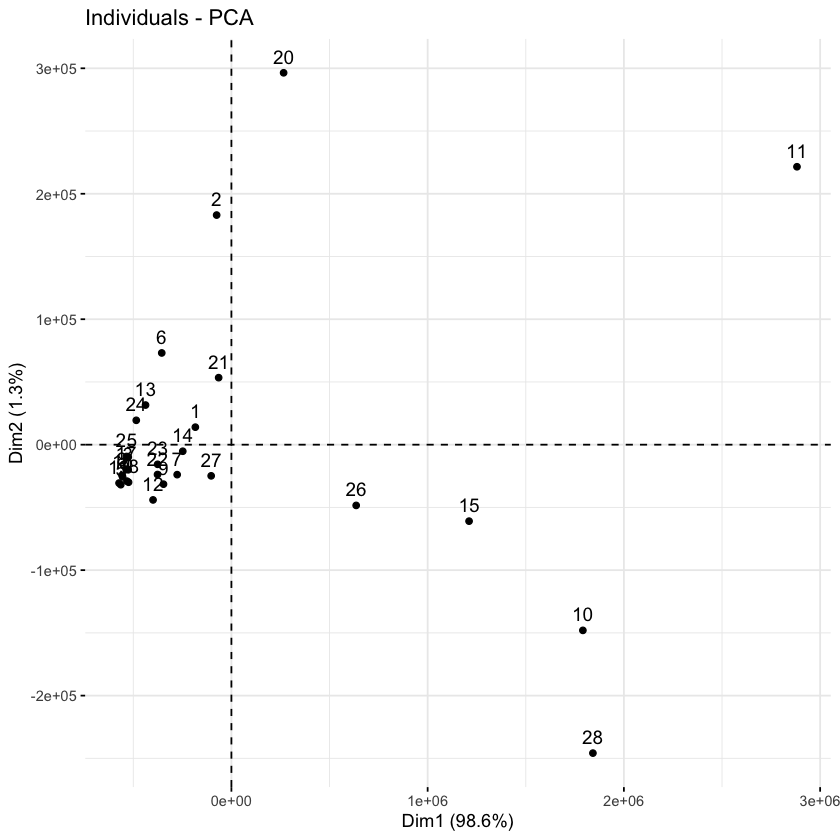

In [16]:
fviz_pca_ind(prcomp(X2, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", geom = "point", ggtheme = theme_classic(),legend = "bottom"))

hop <- get_clust_tendency(X2, n = nrow(X2)-1, graph = FALSE)
hop$hopkins_stat #0.1777662

In [17]:
X3<-trade[,c(2,4,6)] 
X3 #GDP, I_TR_IM,E_TR_IM

GDP,I_TR_IM,E_TR_IM
<dbl>,<dbl>,<dbl>
385711.9,127259.9,36747.7
459819.8,245472.3,136328.9
56086.9,20403.2,11701.6
51579.1,18557.2,5329.5
21137.8,5276.9,3889.6
207772.4,119731.6,36725.9
301340.9,60783.9,26001.0
26035.9,12434.7,3793.5
234453.0,46715.9,19861.0


Warning message:
“In prcomp.default(X3, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", 
    geom = "point", ggtheme = theme_classic(), legend = "bottom") :
 extra arguments ‘title’, ‘geom’, ‘ggtheme’, ‘legend’ will be disregarded”


[1] 0.8137182

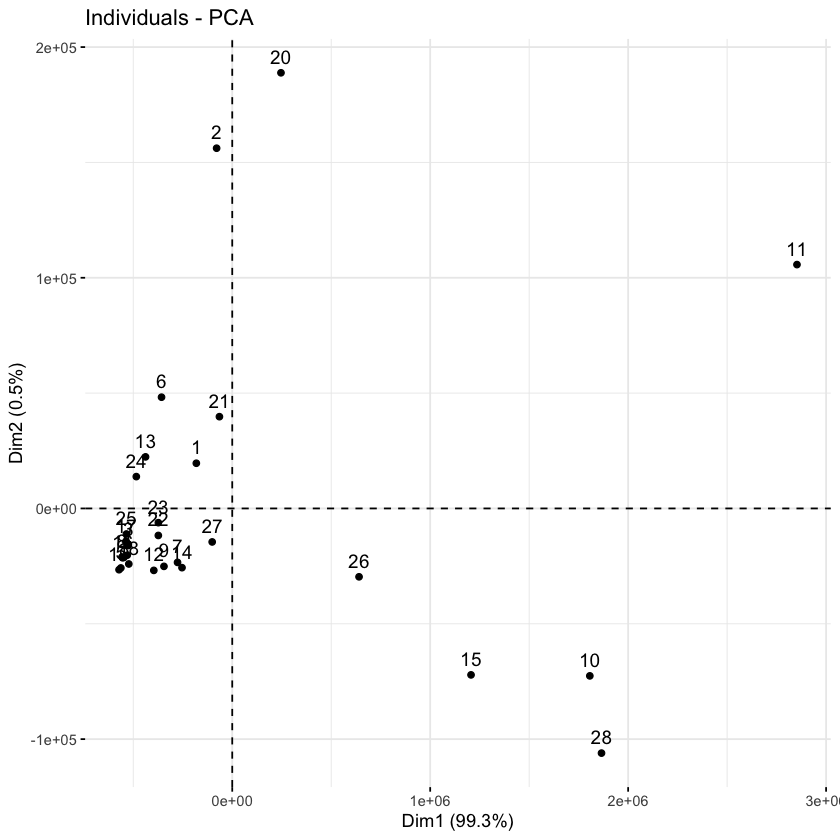

In [18]:
fviz_pca_ind(prcomp(X3, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", geom = "point", ggtheme = theme_classic(),legend = "bottom"))

hop <- get_clust_tendency(X3, n = nrow(X3)-1, graph = FALSE)
hop$hopkins_stat #0.1862818

In [19]:
X4<-trade[,c(7,8,12)] 
X4 #T_TR_I, T_TR_E, A_T_G

T_TR_I,T_TR_E,A_T_G
<dbl>,<dbl>,<dbl>
238933.0,81503.4,237701
533161.6,243529.9,1416428
39678.3,20522.2,29867
28558.5,10078.7,11934
6527.2,6890.9,32186
264222.8,63495.0,90526
117378.1,62014.0,242068
22248.3,8404.3,11475
84599.6,46213.1,196810


Warning message:
“In prcomp.default(X4, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", 
    geom = "point", ggtheme = theme_classic(), legend = "bottom") :
 extra arguments ‘title’, ‘geom’, ‘ggtheme’, ‘legend’ will be disregarded”


[1] 0.8625978

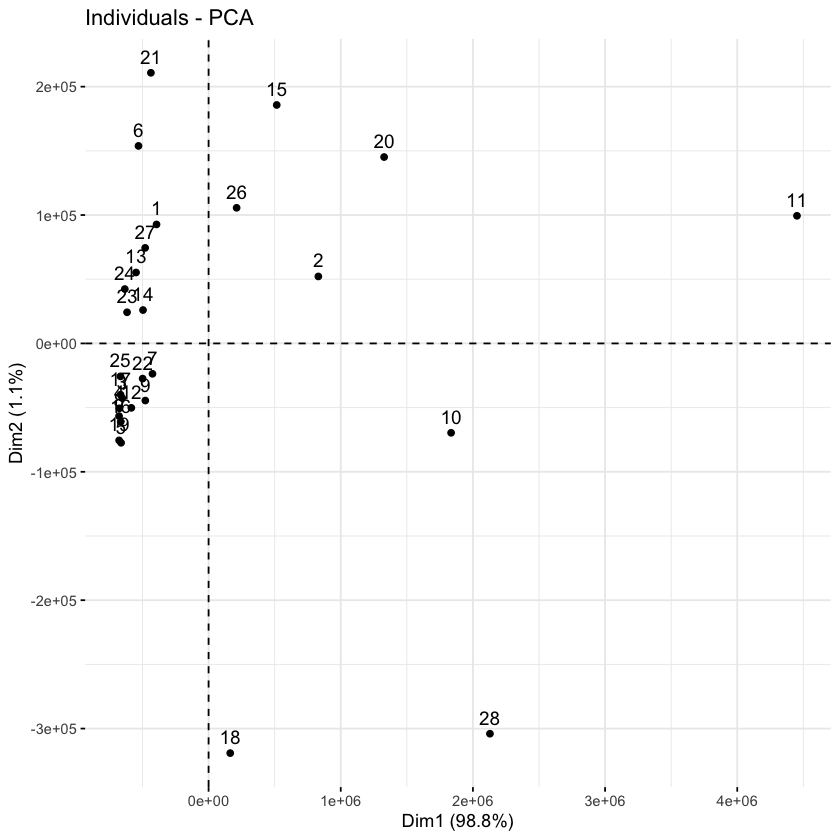

In [20]:

fviz_pca_ind(prcomp(X4, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", geom = "point", ggtheme = theme_classic(),legend = "bottom"))

hop <- get_clust_tendency(X4, n = nrow(X4)-1, graph = FALSE)
hop$hopkins_stat #0.1374022

In [21]:
X5<-trade[,c(11,8,12)] 
X5#I_TR_EX, E_TR_EX, T_TR_E

T_GDP_R,T_TR_E,A_T_G
<dbl>,<dbl>,<dbl>
83.07662,81503.4,237701
168.91215,243529.9,1416428
107.33433,20522.2,29867
74.90864,10078.7,11934
63.47917,6890.9,32186
157.72923,63495.0,90526
59.53128,62014.0,242068
117.73205,8404.3,11475
55.79485,46213.1,196810


Warning message:
“In prcomp.default(X5, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", 
    geom = "point", ggtheme = theme_classic(), legend = "bottom") :
 extra arguments ‘title’, ‘geom’, ‘ggtheme’, ‘legend’ will be disregarded”


[1] 0.8551166

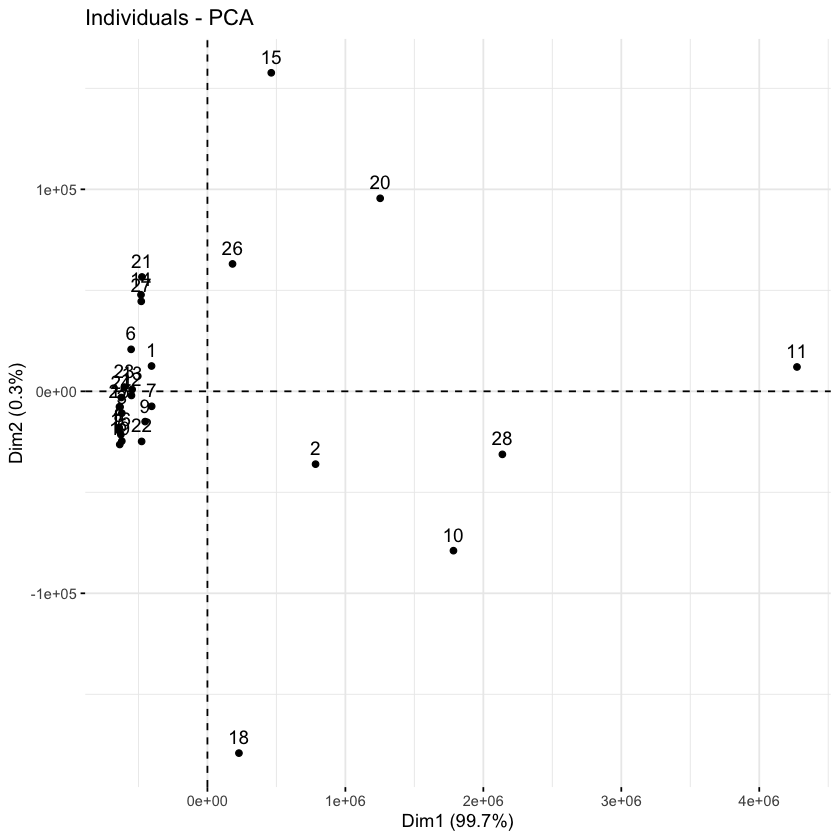

In [22]:
fviz_pca_ind(prcomp(X5, title = "TOTAL TRADE INTRA VS. TOTAL TRADE EXTRA", geom = "point", ggtheme = theme_classic(),legend = "bottom"))

hop <- get_clust_tendency(X5, n = nrow(X5)-1, graph = FALSE)
hop$hopkins_stat #0.1448834

To go further, I will select X1, as it has the less Hopkings value

$hopkins_stat
[1] 0.8494199

$plot


ERROR: Error in eval(expr, envir, enclos): object 'get_cl' not found


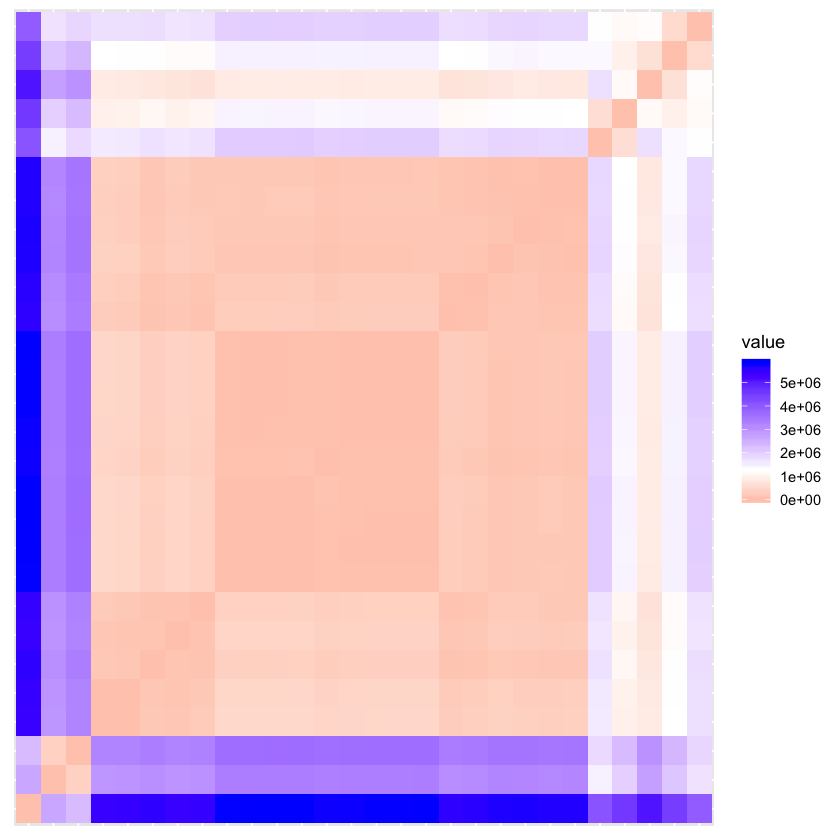

In [24]:
get_clust_tendency(X1, 2, graph=TRUE, gradient=list(low="red", mid="white", high="blue"), seed = 123) 
get_cl

$hopkins_stat
[1] 0.9536594

$plot


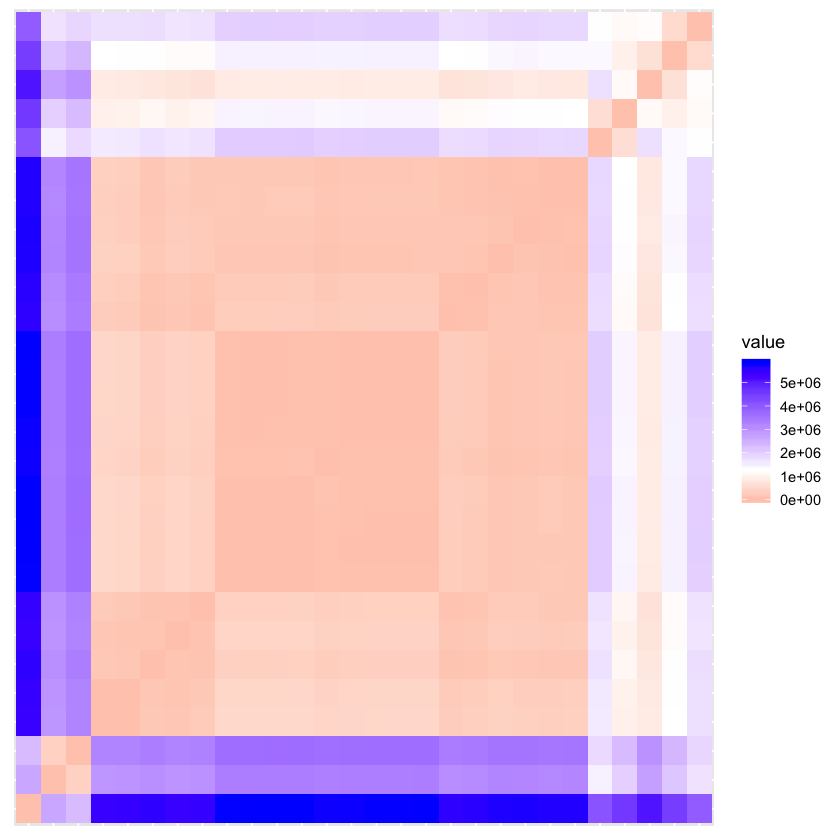

In [27]:
get_clust_tendency(X1, 3, graph=TRUE, gradient=list(low="red", mid="white", high="blue"), seed = 123) 

$hopkins_stat
[1] 0.9905293

$plot


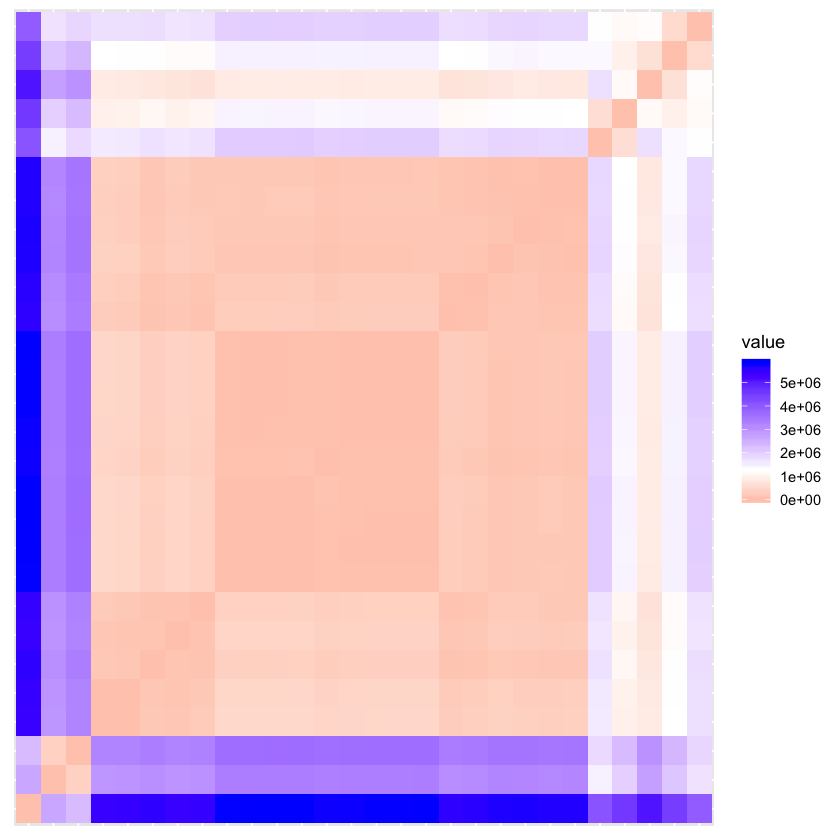

In [28]:
get_clust_tendency(X1, 4, graph=TRUE, gradient=list(low="red", mid="white", high="blue"), seed = 123) 

$hopkins_stat
[1] 0.8645139

$plot


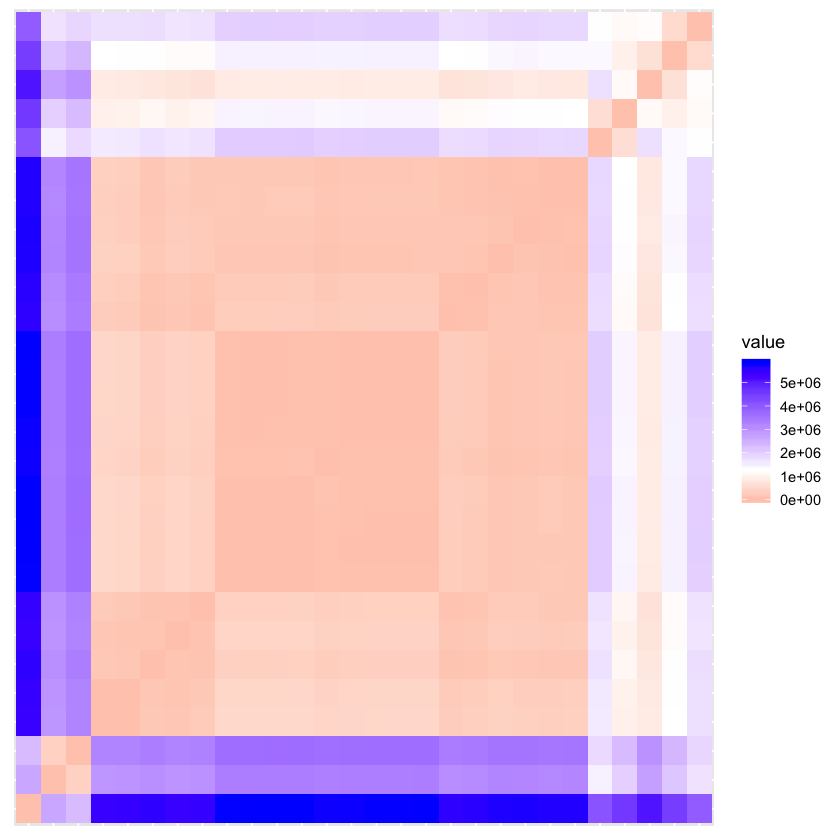

In [29]:
get_clust_tendency(X1, 5, graph=TRUE, gradient=list(low="red", mid="white", high="blue"), seed = 123) 

3)Number of clusters:

3a)I applied d index:

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 


$All.index
        2         3         4         5         6         7         8         9 
538448.59 344488.62 239732.59 184447.65 159562.98 117449.20  95298.51  76051.16 
       10 
 45686.66

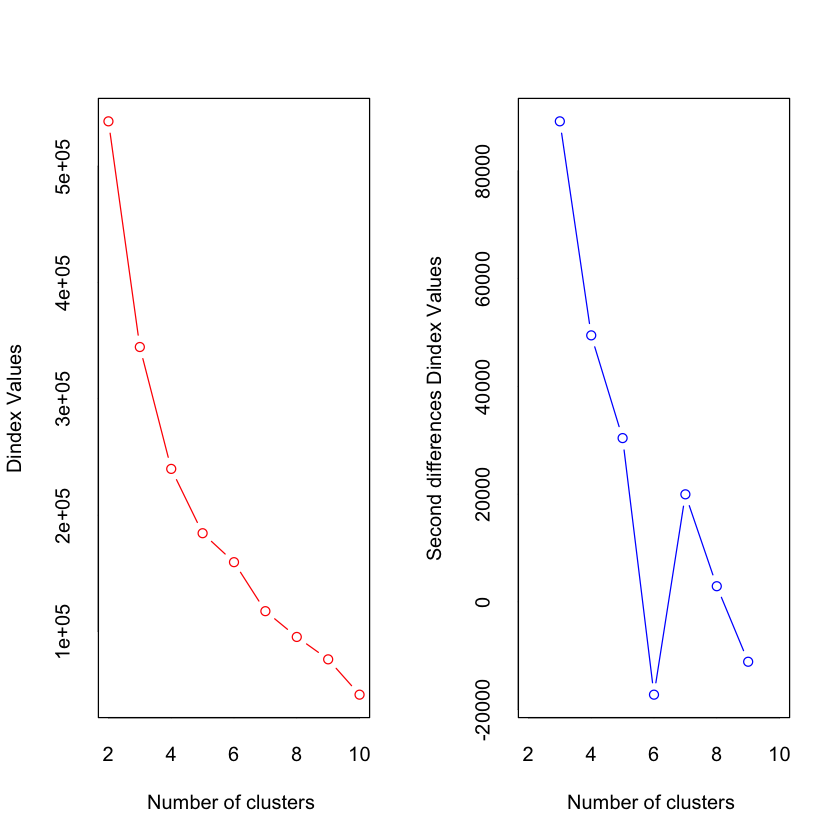

In [30]:
NbClust(X1, distance="euclidean", min.nc=2, max.nc=10, method="ward.D2", index="dindex") #D index

As per the above graphic, it seems that the optimum is 4 clusters, the same according to the index.

3b) I applied Hubert:

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


$All.index
 2  3  4  5  6  7  8  9 10 
 0  0  0  0  0  0  0  0  0

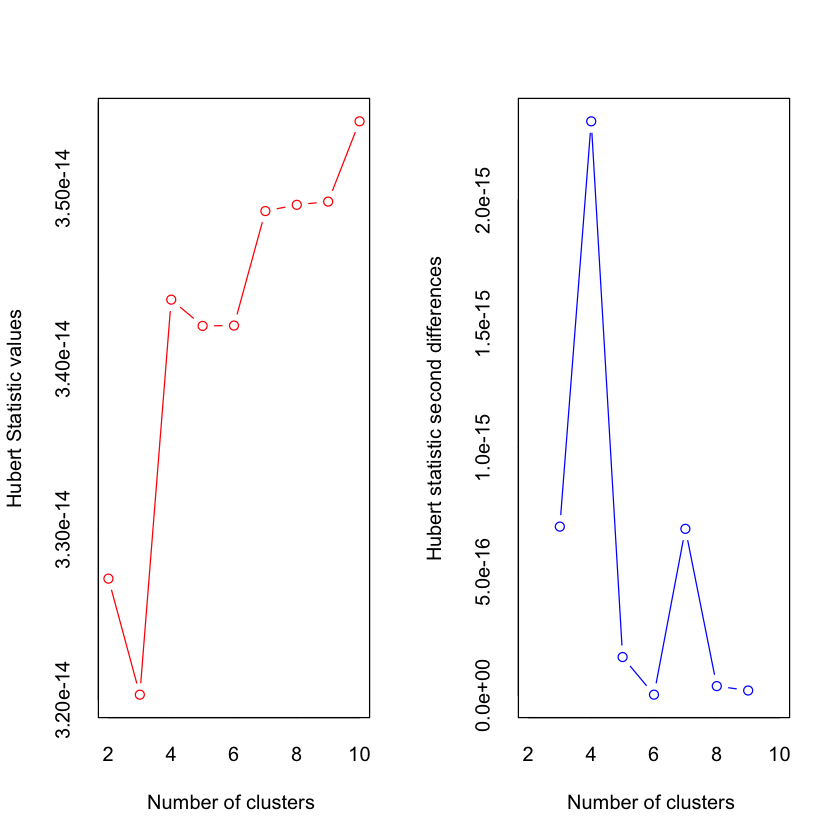

In [31]:
NbClust(X1, distance="euclidean", min.nc=2, max.nc=10, method="ward.D2", index="hubert") #Hubert

As per the above graphic, also it seems that the optimum option is to choose 4 clusters.

3c) I applied K-means (silhouette and wss):

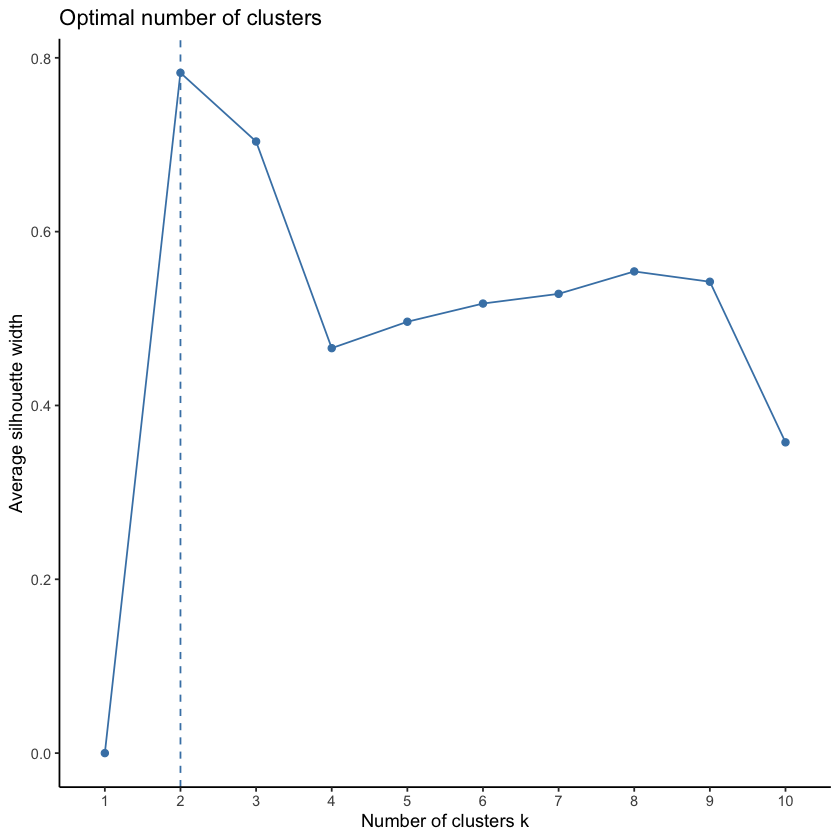

In [32]:
fviz_nbclust(X1, FUNcluster=kmeans, method="silhouette")+theme_classic() #K-means - silhouette

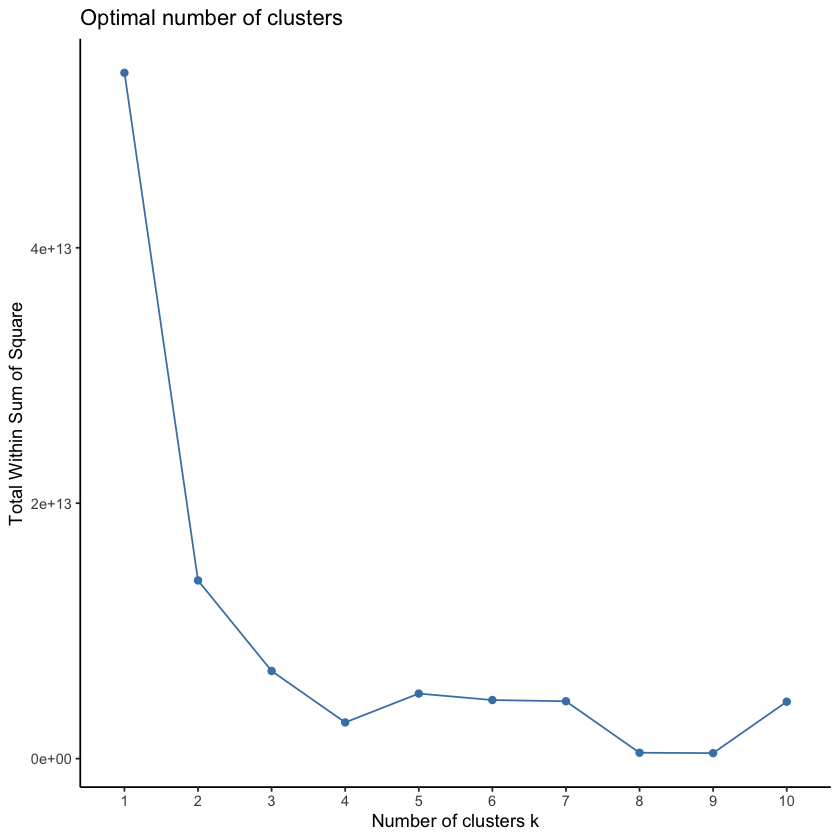

In [33]:
fviz_nbclust(X1, kmeans, method="wss")+theme_classic() #K-means - wss

As a result of this operation it appears that the optimal number of clusters should be 2, also we can consider 3, as there is not a lot of difference between both values

3d) I applied PAM (silhouette and wss):

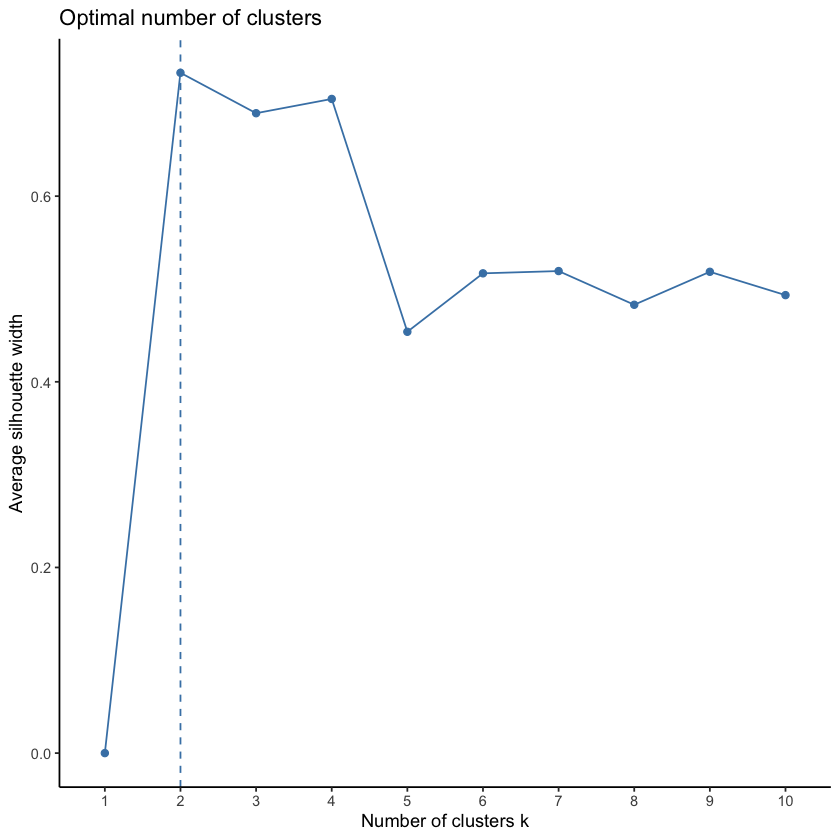

In [34]:
fviz_nbclust(X1, pam, method="silhouette")+theme_classic() #PAM - silhouette

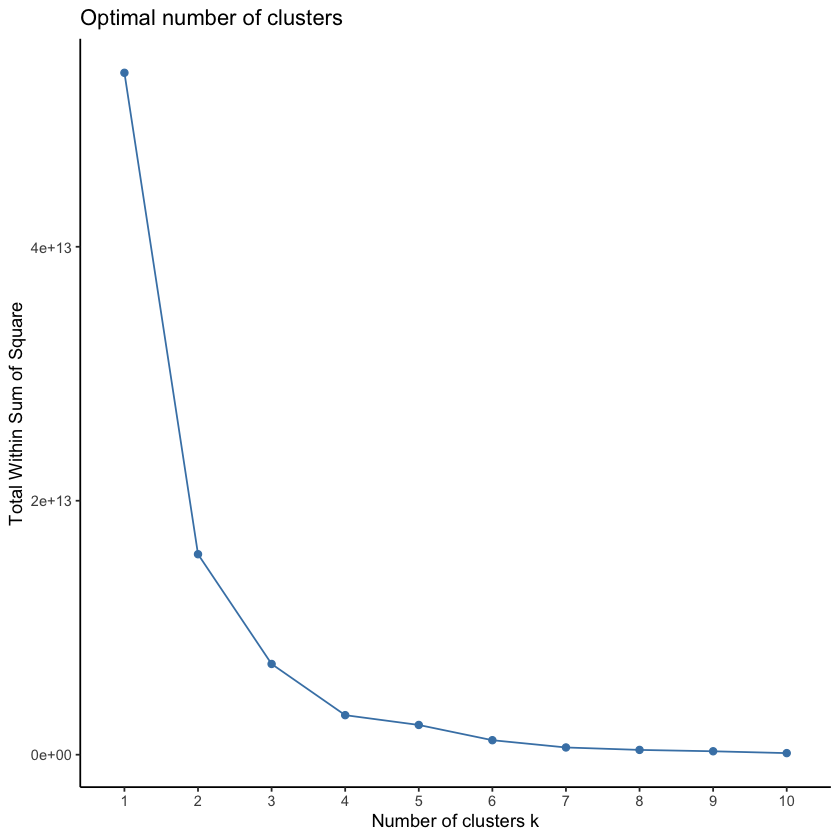

In [35]:
fviz_nbclust(X1, pam, method="wss")+theme_classic() #PAM - wss

As per the above results, it looks that the optimal number of clusters should be 2, also we can consider 3 and 4, as there is not a lot of difference between these values.

Considering all the results above, I could say that the number of optimal clusters should be 3, because the result of two methods considered the optimal as 4 clusters, and another two methods considered the optimal as 2, hence I believe it would be better to take the average.

4)Clustering

4a)K-means:

  cluster size ave.sil.width
1       1    3          0.32
2       2   21          0.82
3       3    4          0.36


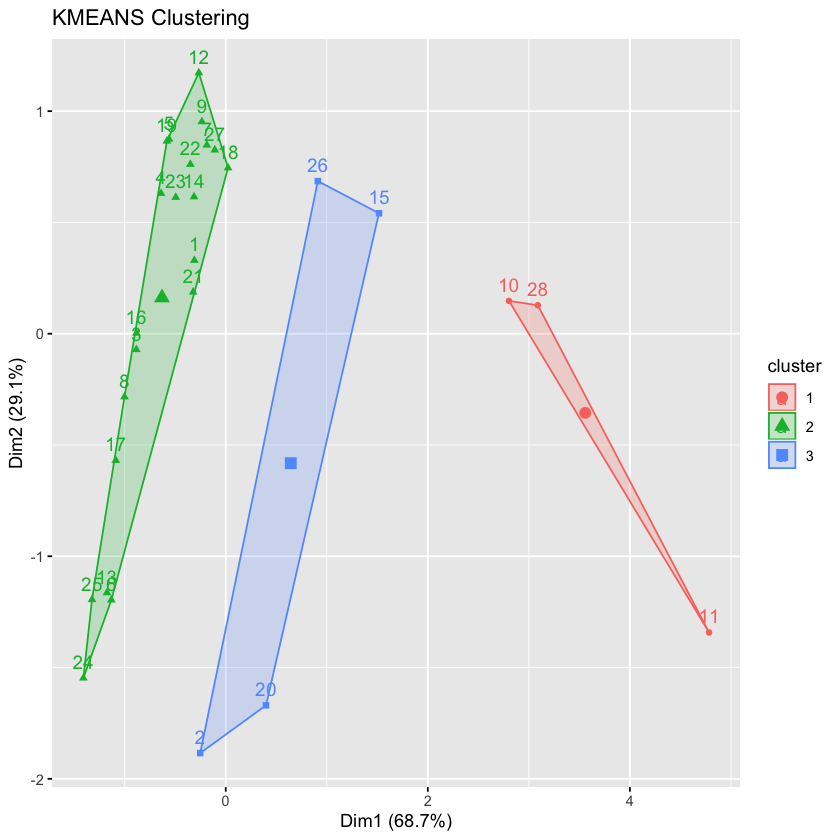

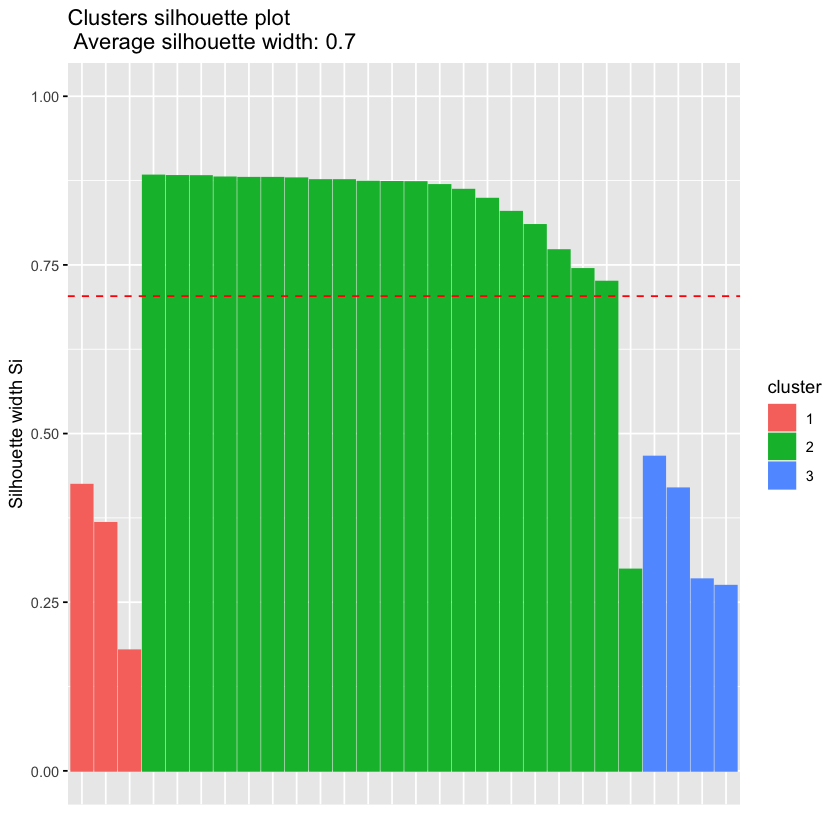

In [36]:
kmeans <- eclust(X1,FUNcluster="kmeans", k=3,hc_metric = "euclidean")

kmeans.sil<-silhouette(kmeans$cluster, dist(X1))
fviz_silhouette(kmeans.sil)

The average of silhouette width for K-means is 0,7. Analyzing the position of the data points in the graph, it seems that they matched with their own cluster.

4b)PAM:

  cluster size ave.sil.width
1       1   20          0.86
2       2    5          0.21
3       3    3          0.37


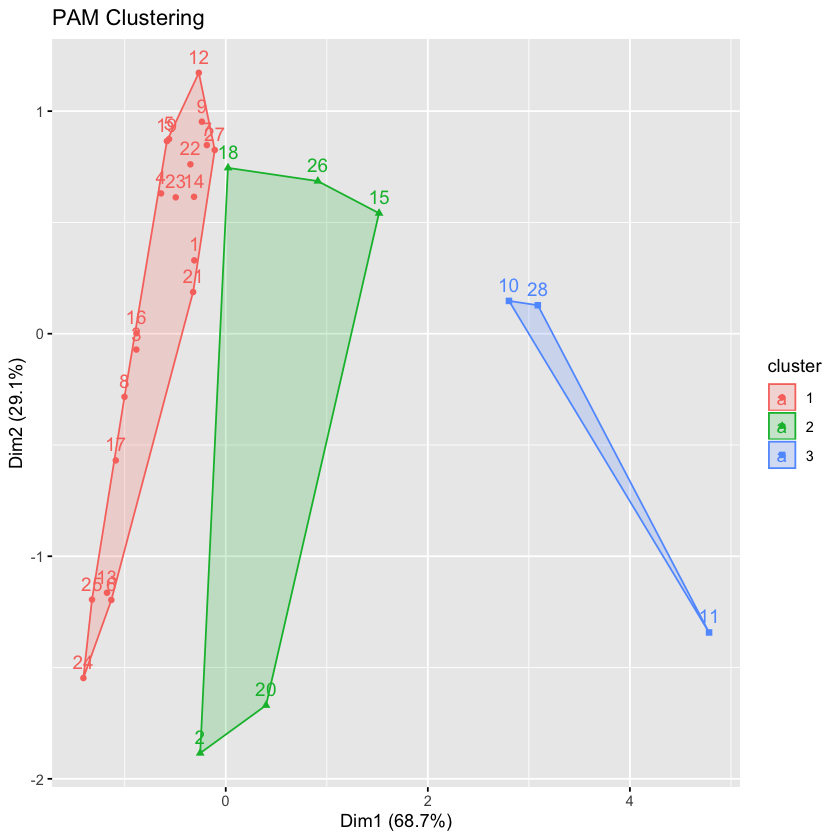

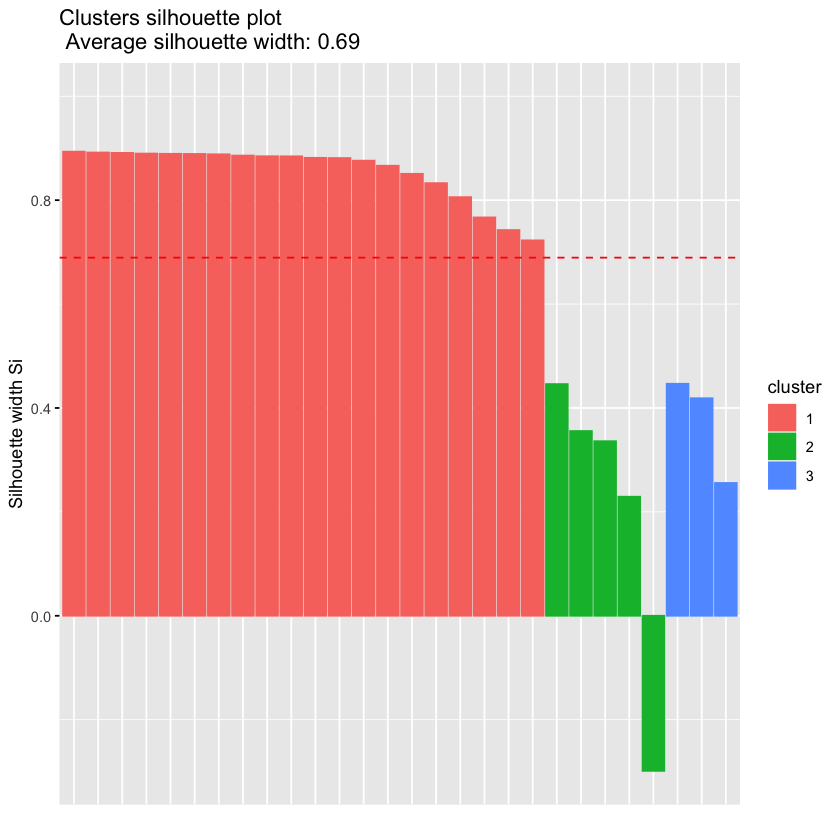

In [37]:
pam <- eclust(X1,FUNcluster="pam", k=3,hc_metric = "euclidean")

pam.sil<-silhouette(pam$cluster, dist(X1))
fviz_silhouette(pam.sil)

The average of silhouette width for PAM is 0,69. 

It appears that K-mean fits the data better, hence I will continue using K-means method.

5)Post-diagnostics

Found more than one class "kcca" in cache; using the first, from namespace 'flexclust'

Also defined by ‘kernlab’

Found more than one class "kcca" in cache; using the first, from namespace 'flexclust'

Also defined by ‘kernlab’



        1         2         3 
0.5932179 0.2197336 0.5746008 

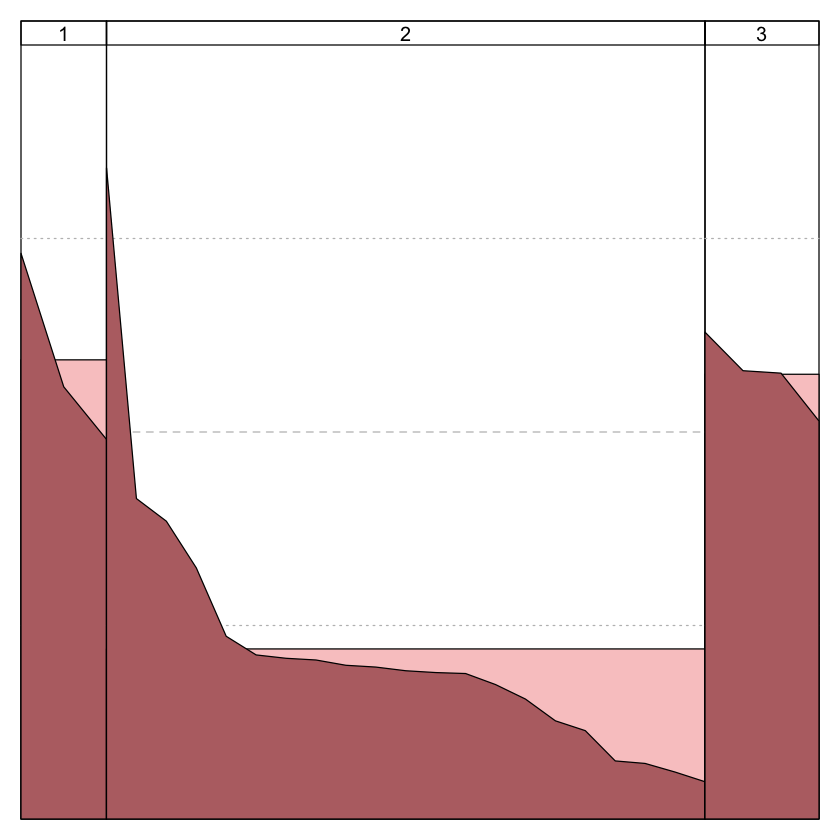

In [38]:
d1<-cclust(X1, 3, dist="euclidean")
shadow(d1)

plot(shadow(d1))

As per the above values, I can conclude that the data is not clustered properly, as the first and the third value are similar.

For the reason above, I will attempt to perform the same analysis considering two clusters with K-means method:

        1         2 
0.1823198 0.5727513 

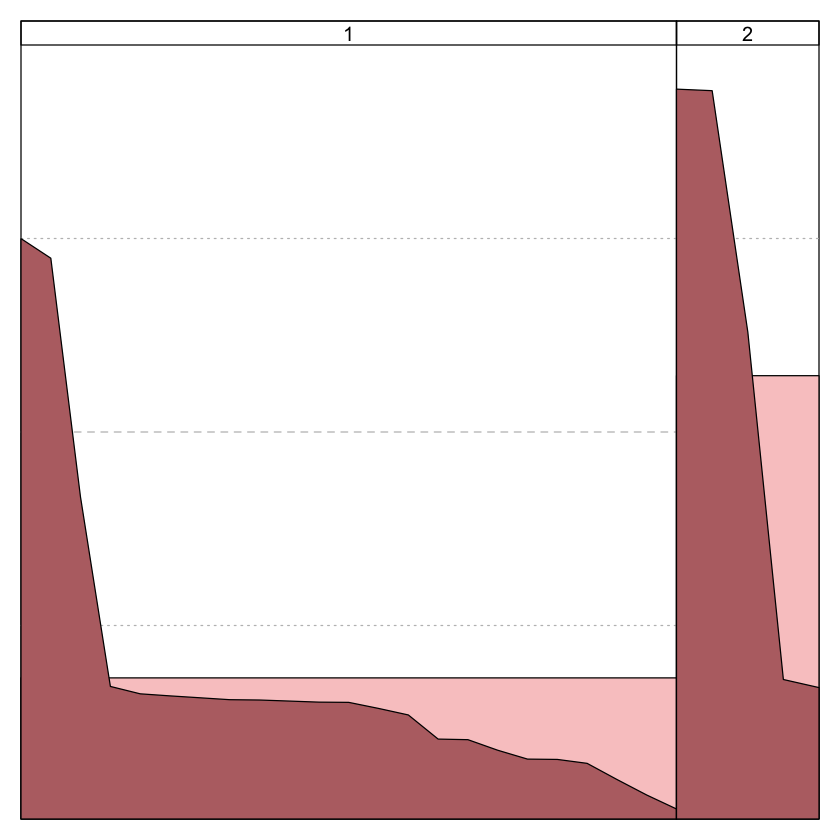

In [39]:
d2<-cclust(X1, 2, dist="euclidean")
shadow(d2)

plot(shadow(d2))

As per the above values for two clusters, I can conclude that the data is clustered properly, the values of the clusters are not close.

Therefore, I will proceed once again to perform the analysis of the point 4a), in this case with two clusters:

  cluster size ave.sil.width
1       1    3          0.55
2       2   25          0.81


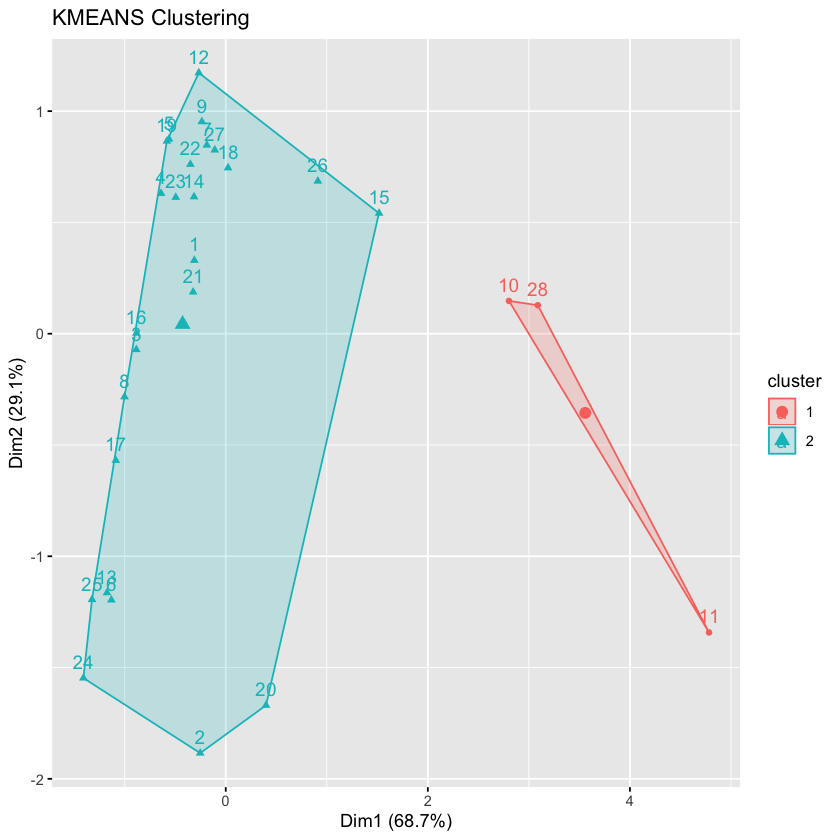

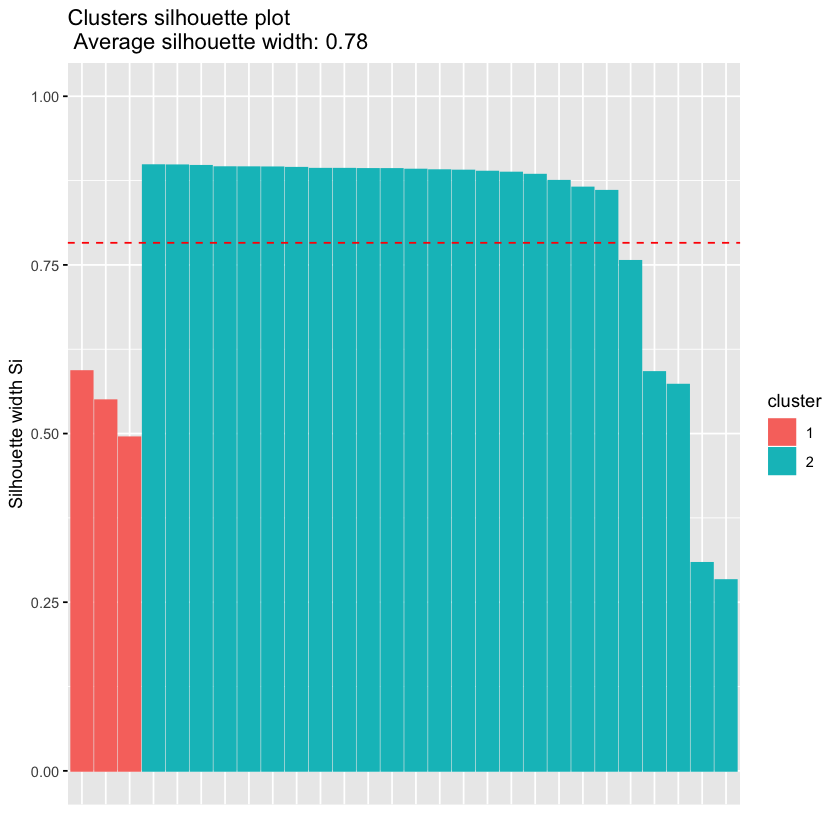

In [40]:
kmeans1 <- eclust(X1,FUNcluster="kmeans", k=2,hc_metric = "euclidean")

kmeans1.sil<-silhouette(kmeans1$cluster, dist(X1))
fviz_silhouette(kmeans1.sil)

The average silhouette is 0,78. Greater than with three clusters.

6)Results:

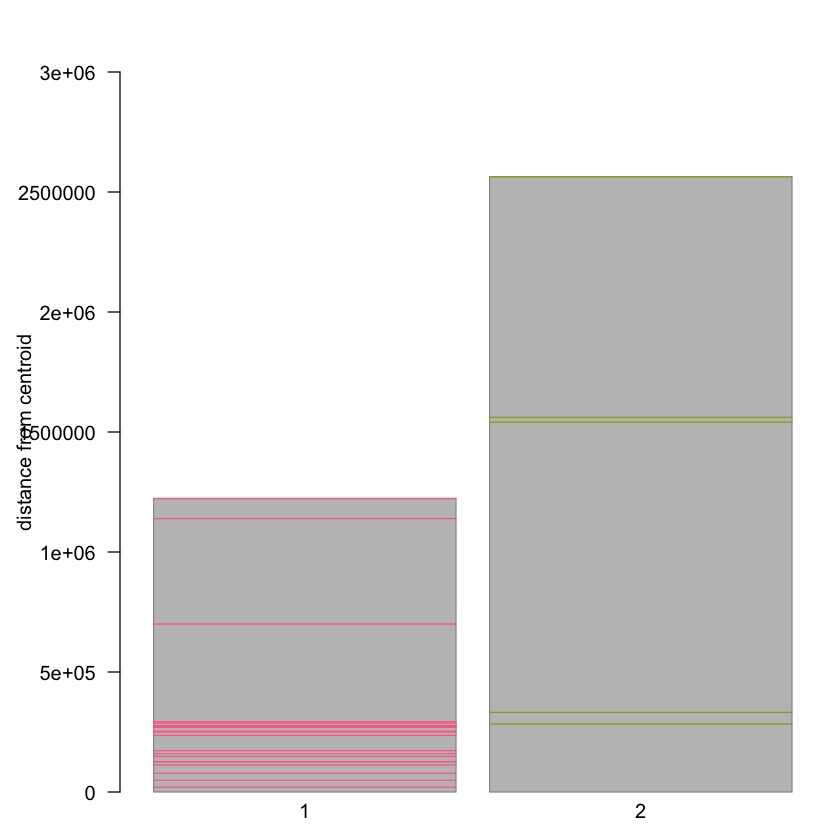

In [41]:
stripes(d2)

There is a lot of distance in the second cluster, this means that the countries differ the most in the second group.

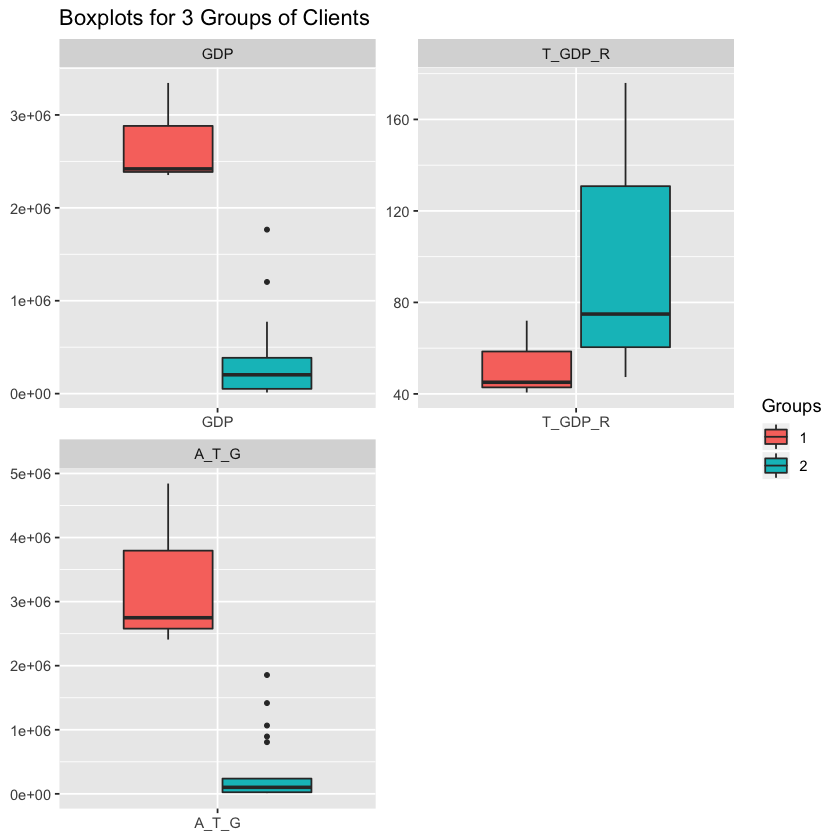

In [42]:
ToCluster.c<-cbind(X1, kmeans1$cluster)
colnames(ToCluster.c)[4]<-c("Group")

df.m <- melt(ToCluster.c, id.var = "Group")
df.m$Group <- as.character(df.m$Group)

p <- ggplot(data = df.m, aes(x=variable, y=value)) +
  geom_boxplot(aes(fill = Group),outlier.size = 1) +
  facet_wrap( ~ variable, scales="free", ncol = 2) +
  xlab(label = NULL) + ylab(label = NULL) + ggtitle("Boxplots for 3 Groups of Clients") +
  guides(fill=guide_legend(title="Groups"))

p 

1) Orange – Big economies

The first group of countries has high GDP, with a low trade of GDP ratio, but big air transport of goods.

2)Blue – Small economies

The second group of countries has small GDP, in average it has greater trade GDP than the first group, but less air transports of goods than the first group.


8)Conclusions:

The method K-Means shows that the optimum division of the data would be in two clusters, considering the following variables: GDP, T_GDP_R and A_T_G.

The two groups have differing characteristics, divided between big countries with big GDP, and small countries with small GDP, with more distance in the first group of big economies. Regarding T_GDP_R the second group has a huge distance in comparison with the first. Finally, for the variable A_T_G, the second group has not a lot of distance, the data are concentrated around the same point.